# Importing Libraries

In [2]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm
from tqdm import tqdm
import cv2


# Extract Filenames from Folder

In [3]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [4]:
len(filenames)

44441

# Importing ResNet50 Model and Cofiguration

In [5]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

# Extracting Fetaures from Image

In [6]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

# Loading Pickle Files

In [7]:
feature_list = pkl.load(open('final_combined_features.pkl','rb'))

In [8]:
print(np.array(feature_list).shape)

(44441, 2048)


In [10]:
filenames = pkl.load(open('filenames.pkl','rb'))
print(np.array(filenames).shape)
print(filenames)

(44441,)
['images\\10000.jpg', 'images\\10001.jpg', 'images\\10002.jpg', 'images\\10003.jpg', 'images\\10004.jpg', 'images\\10005.jpg', 'images\\10006.jpg', 'images\\10007.jpg', 'images\\10008.jpg', 'images\\10009.jpg', 'images\\10010.jpg', 'images\\10011.jpg', 'images\\10012.jpg', 'images\\10013.jpg', 'images\\10014.jpg', 'images\\10015.jpg', 'images\\10016.jpg', 'images\\10017.jpg', 'images\\10018.jpg', 'images\\10019.jpg', 'images\\10020.jpg', 'images\\10021.jpg', 'images\\10022.jpg', 'images\\10023.jpg', 'images\\10024.jpg', 'images\\10025.jpg', 'images\\10026.jpg', 'images\\10027.jpg', 'images\\10028.jpg', 'images\\10029.jpg', 'images\\10030.jpg', 'images\\10031.jpg', 'images\\10032.jpg', 'images\\10033.jpg', 'images\\10034.jpg', 'images\\10035.jpg', 'images\\10037.jpg', 'images\\10039.jpg', 'images\\10040.jpg', 'images\\10041.jpg', 'images\\10042.jpg', 'images\\10043.jpg', 'images\\10044.jpg', 'images\\10045.jpg', 'images\\10046.jpg', 'images\\10047.jpg', 'images\\10048.jpg', 'im

In [96]:
#Finidng Simialar Images

In [11]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [12]:
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [13]:
input_image = extract_features_from_images('sample/p18.png',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


In [14]:
distance,indices = neighbors.kneighbors([input_image])

In [15]:
print(indices)

[[26321 40425 16647 31529 21180 29581]]


In [ ]:


for file in indices[0][1:6]:
    temp_img = cv2.imread(filenames[file])
    if temp_img is not None:  # Check if the image was successfully loaded
        resized_img = cv2.resize(temp_img, (512, 512))  # Correctly resize the image
        cv2.imshow('output', resized_img)
        cv2.waitKey(0)
    else:
        print(f"Failed to load image: {filenames[file]}")

cv2.destroyAllWindows()  # Ensure all windows are closed after displaying images


In [1]:
Image('sample/p18.png')

NameError: name 'Image' is not defined

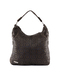

In [57]:
Image(filenames[indices[0][1]])

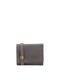

In [51]:
Image(filenames[indices[0][2]])

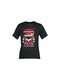

In [44]:
Image(filenames[indices[0][3]])

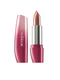

In [45]:
Image(filenames[indices[0][4]])

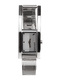

In [46]:
Image(filenames[indices[0][5]])